In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('../../lib/')
import matplotlib.pyplot as plt
from frustration_graph import *
from frustration_traditional import * 

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

## Wall CPU

In [3]:
L = 40
N = 100
ratios = np.linspace(0, 1, N)
Ts = np.linspace(0.1, 3.5, N)
err = 10

try:
    res = pd.read_csv(f"../../Results/Ising_Frustrated/Classical/res_wall_{L}_{N}x{N}_{err}err.gzip", compression='gzip')
except:
    res = transition(L, Ts, ratios, err_runs=err, workers=12)
    res.to_csv(f"../../Results/Ising_Frustrated/Classical/res_wall_{L}_{N}x{N}_{err}err.gzip", compression='gzip', index=False)

In [4]:
res

,T,ratio,M,M_std,X,X_std,U,W
0,0.1,0.000000,1.000000,0.000000,0.000000,0.000000,0.666667,0.0000
1,0.1,0.010101,1.000000,0.000000,0.000000,0.000000,0.666667,0.0000
2,0.1,0.020202,1.000000,0.000000,0.000000,0.000000,0.666667,0.0000
3,0.1,0.030303,1.000000,0.000000,0.000000,0.000000,0.666667,0.0000
4,0.1,0.040404,1.000000,0.000000,0.000000,0.000000,0.666667,0.0000
...,...,...,...,...,...,...,...,...
9995,3.5,0.959596,0.016931,0.000245,0.074790,0.003227,-0.004350,1429.7825
9996,3.5,0.969697,0.016900,0.000286,0.075764,0.002914,-0.007742,1432.0039
9997,3.5,0.979798,0.016710,0.000295,0.073578,0.002670,-0.007932,1435.1274
9998,3.5,0.989899,0.016773,0.000397,0.073446,0.003369,-0.008413,1436.9060


In [8]:
res, config = thermalization_config(25, 0.1, 1, 0, 1)

In [10]:
wall(config)

1200

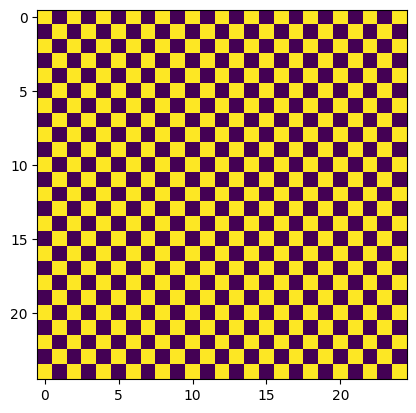

In [9]:
plt.imshow(config)

In [28]:
res

,Unnamed: 0,T,ratio,M,M_std,X,X_std,U,W
0,0,0.1,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.666667,0.0000
1,1,0.1,0.010101,1.000000,0.000000,0.000000,0.000000e+00,0.666667,0.0000
2,2,0.1,0.020202,1.000000,0.000000,0.000000,0.000000e+00,0.666667,0.0000
3,3,0.1,0.030303,0.716923,0.000000,0.012876,1.734723e-18,0.666662,56.0000
4,4,0.1,0.040404,0.043077,0.000000,0.028781,0.000000e+00,0.663495,56.0000
...,...,...,...,...,...,...,...,...,...
9995,9995,3.5,0.959596,0.026352,0.000444,0.077130,4.379820e-03,0.007826,604.2144
9996,9996,3.5,0.969697,0.025581,0.000624,0.073903,2.921973e-03,-0.023233,604.9871
9997,9997,3.5,0.979798,0.025401,0.000383,0.071273,2.511679e-03,0.009990,606.0500
9998,9998,3.5,0.989899,0.025586,0.000471,0.071797,2.138907e-03,-0.010265,606.7968


In [30]:
Ts.shape

(100,)

In [5]:
W_matrix = np.zeros((N, N))

Ts = res["T"].unique()


for i, T in enumerate(Ts):
    W_matrix[i, :] = res[res['T'] == T]['W']

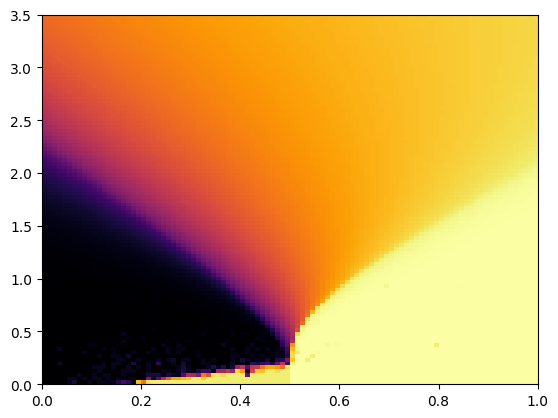

In [6]:
plt.imshow(W_matrix[::-1, :], extent=[0,1,0,3.5], aspect='auto', cmap='inferno')